In [2]:
#1. Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# 2. Load Dataset
df = pd.read_csv("creditcard.csv")

In [4]:
# 3. Basic Exploration
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print("Total transactions:", len(df))
print("Fraudulent transactions:", df['Class'].sum())
print("Fraud %:", round(df['Class'].mean() * 100, 2))

Total transactions: 284807
Fraudulent transactions: 492
Fraud %: 0.17


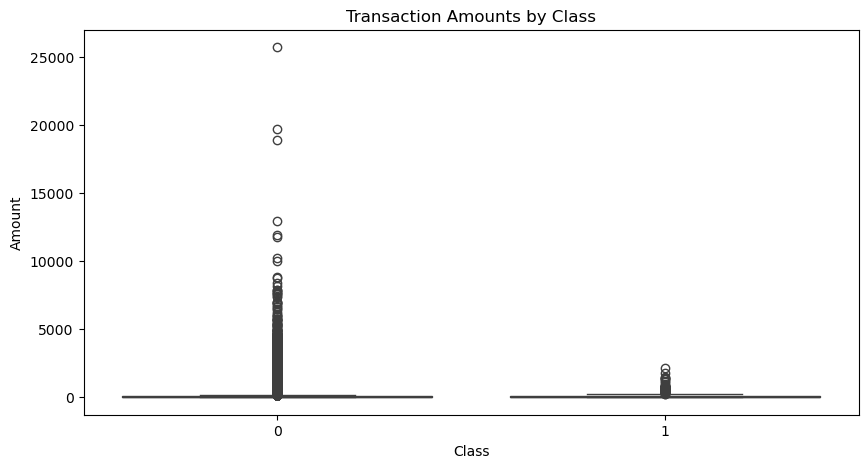

In [6]:
# 4. Anomaly Detection in Transaction Amounts
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title("Transaction Amounts by Class")
plt.show()

In [7]:
# 5. Data Preprocessing
# Normalize 'Amount' and drop 'Time'
scaler = StandardScaler()
df['Amount_Norm'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)

In [8]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
# SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [10]:
# 6. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

In [11]:
# 7. Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [23]:
# 8. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[85128    21]
 [    0 85440]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



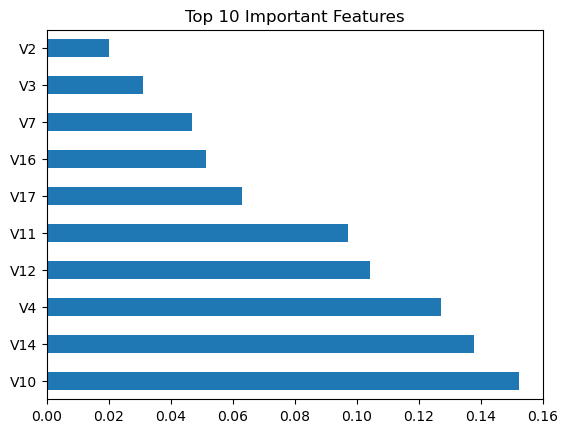

In [25]:
# 9. Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

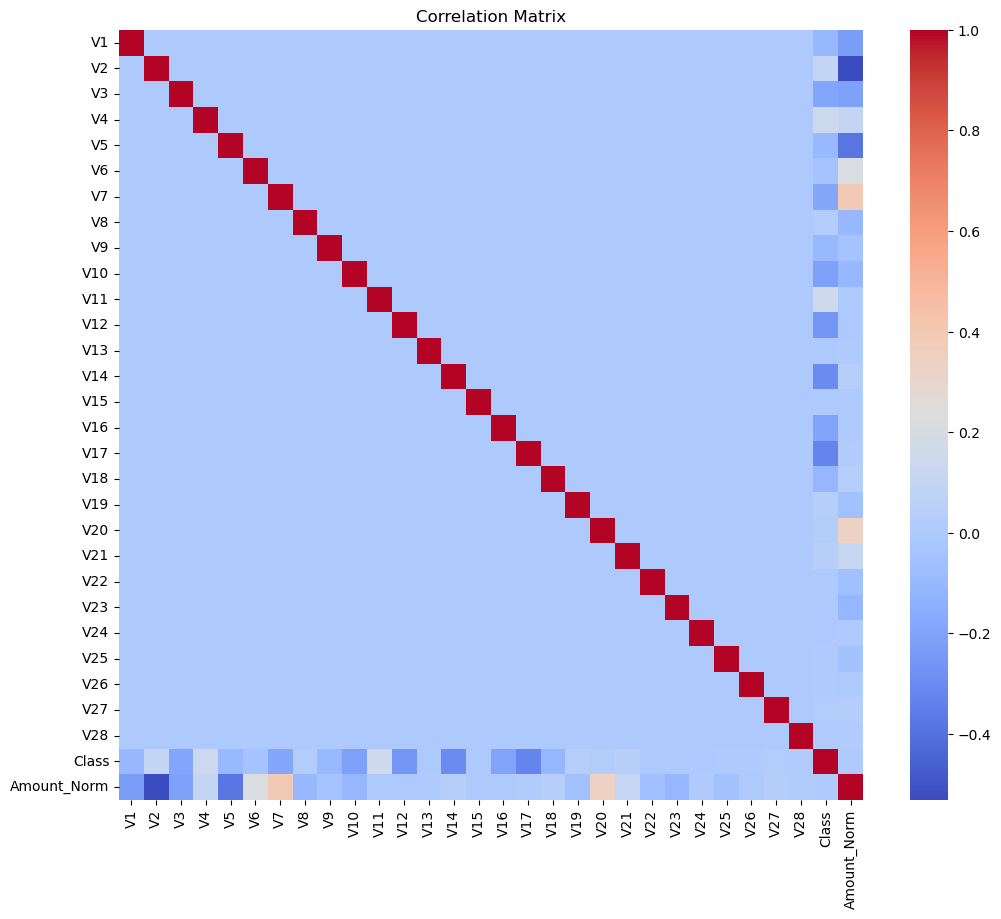

In [27]:
# 10. Correlation Analysis
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Conclusion
print("Fraud detection model trained using Random Forest with SMOTE handling class imbalance.")

Fraud detection model trained using Random Forest with SMOTE handling class imbalance.
